<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Bar Charts**


Estimated time needed: **30** minutes


In this lab, you will focus on visualizing data.

The dataset will be provided to you in the form of an RDBMS.

You will use SQL queries to extract the necessary data.


## Objectives


In this lab you will perform the following:


-   Visualize the distribution of data

-   Visualize the relationship between two features

-   Visualize the composition of data

-   Visualize comparison of data


## Setup: Working with the Database
**Install the needed libraries**


In [1]:
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 106.3 MB/s eta 0:00:00


In [2]:
!pip install matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 92.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 83.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 83.6 MB/s eta 0:00:00


**Download and connect to the database file containing survey data.**


To start, download and load the dataset into a `pandas` DataFrame.



In [3]:
# Step 1: Download the dataset
!wget -O survey-data.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv

# Step 2: Import necessary libraries and load the dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv("survey-data.csv")

# Display the first few rows to understand the structure of the data
df.head()


--2025-01-25 15:01:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 159525875 (152M) [text/csv]
Saving to: ‘survey-data.csv’

survey-data.csv     100%[===================>] 152.13M  57.1MB/s    in 2.7s    

2025-01-25 15:01:40 (57.1 MB/s) - ‘survey-data.csv’ saved [159525875/159525875]



,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Task 1: Visualizing Data Distributions


##### 1. Histogram of `ConvertedCompYearly`


Visualize the distribution of yearly compensation (`ConvertedCompYearly`) using a histogram.



In [4]:
# Print statistics for 'ConvertedCompYearly'
print("Statistical Summary for Yearly Compensation (ConvertedCompYearly):")
print(df['ConvertedCompYearly'].describe())

Statistical Summary for Yearly Compensation (ConvertedCompYearly):
count    2.343500e+04
mean     8.615529e+04
std      1.867570e+05
min      1.000000e+00
25%      3.271200e+04
50%      6.500000e+04
75%      1.079715e+05
max      1.625660e+07
Name: ConvertedCompYearly, dtype: float64


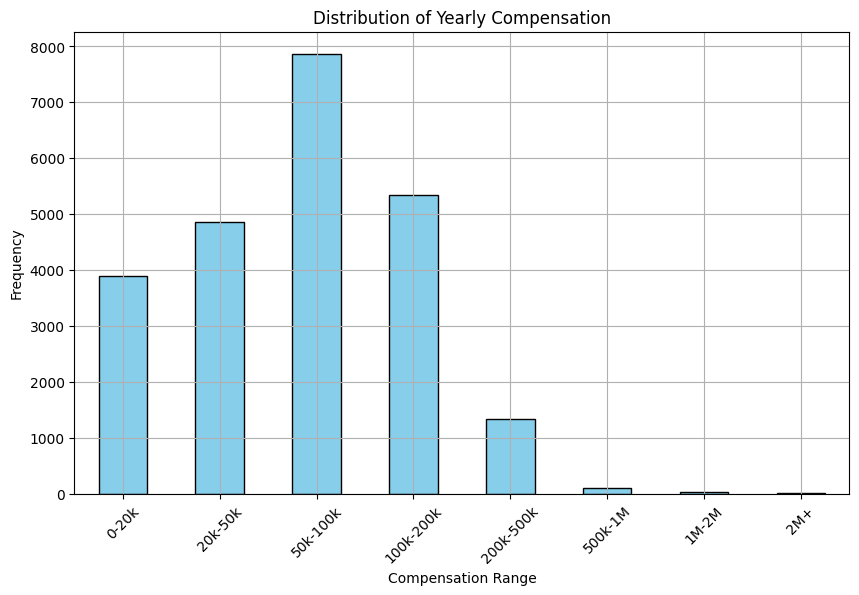

In [5]:
## Write your code here

# Define custom bins for compensation ranges
bins = [0, 20000, 50000, 100000, 200000, 500000, 1000000, 2000000, 10000000]
bin_labels = ['0-20k', '20k-50k', '50k-100k', '100k-200k', '200k-500k', '500k-1M', '1M-2M', '2M+']

# Categorize the 'ConvertedCompYearly' into these bins
df['CompensationBin'] = pd.cut(df['ConvertedCompYearly'], bins=bins, labels=bin_labels, right=False)

# Plotting the histogram of 'ConvertedCompYearly' based on custom bins
plt.figure(figsize=(10, 6))
df['CompensationBin'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Yearly Compensation')
plt.xlabel('Compensation Range')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 2. Box Plot of `Age`


Since `Age` is categorical in the dataset, convert it to numerical values for a box plot.



In [6]:
# Print the distribution of the 'Age' column
print("Age Distribution:")
print(df['Age'].value_counts().sort_index())

Age Distribution:
Age
18-24 years old       14098
25-34 years old       23911
35-44 years old       14942
45-54 years old        6249
55-64 years old        2575
65 years or older       772
Prefer not to say       322
Under 18 years old     2568
Name: count, dtype: int64


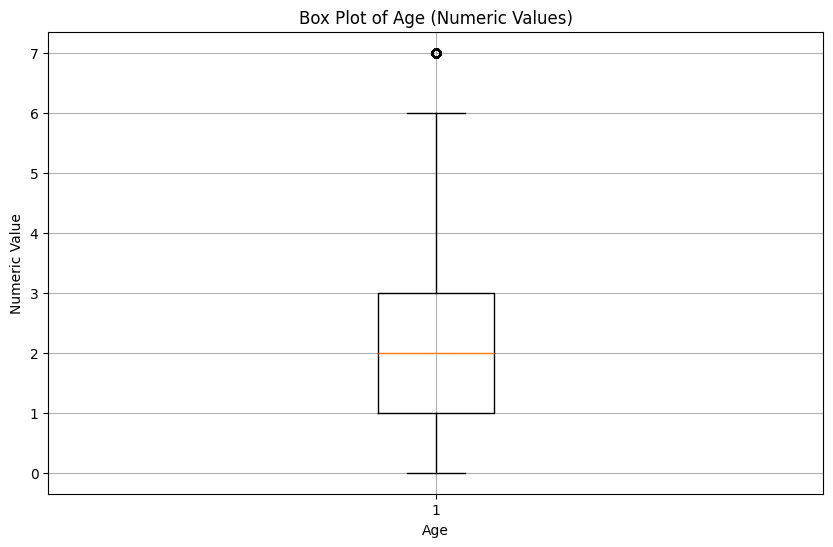

In [7]:
## Write your code here

# Create a mapping of Age groups to numerical values
age_mapping = {
    'Under 18 years old': 0,
    '18-24 years old': 1,
    '25-34 years old': 2,
    '35-44 years old': 3,
    '45-54 years old': 4,
    '55-64 years old': 5,
    '65 years or older': 6,
    'Prefer not to say': 7
}

# Map the 'Age' column to numerical values
df['AgeNumeric'] = df['Age'].map(age_mapping)

# Plotting the box plot of the numerical 'Age' column
plt.figure(figsize=(10, 6))
plt.boxplot(df['AgeNumeric'].dropna())
plt.title('Box Plot of Age (Numeric Values)')
plt.xlabel('Age')
plt.ylabel('Numeric Value')
plt.grid(True)
plt.show()

### Task 2: Visualizing Relationships in Data


##### 1. Scatter Plot of `Age_numeric` and `ConvertedCompYearly`


Explore the relationship between age and compensation.



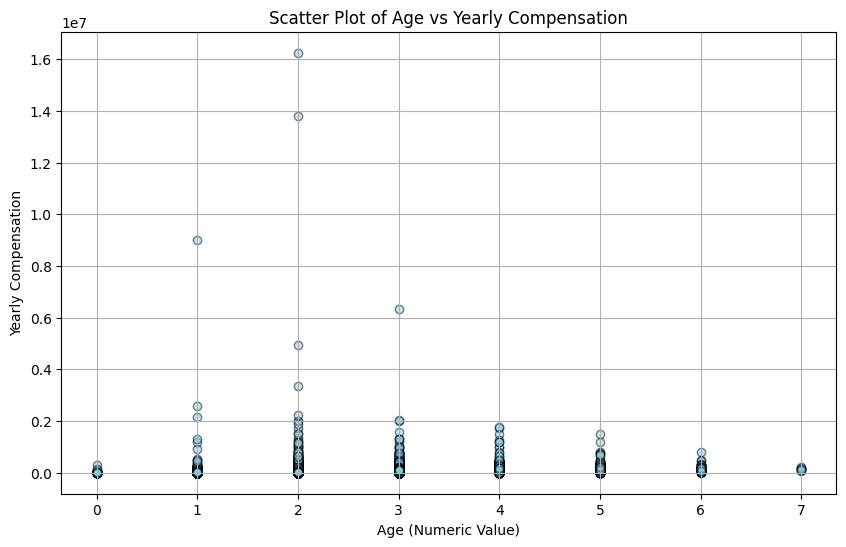

In [9]:
## Write your code here

# Plotting the scatter plot of 'AgeNumeric' and 'ConvertedCompYearly'
plt.figure(figsize=(10, 6))
plt.scatter(df['AgeNumeric'], df['ConvertedCompYearly'], alpha=0.5, color='skyblue', edgecolor='black')
plt.title('Scatter Plot of Age vs Yearly Compensation')
plt.xlabel('Age (Numeric Value)')
plt.ylabel('Yearly Compensation')
plt.grid(True)
plt.show()

##### 2. Bubble Plot of `ConvertedCompYearly` and `JobSatPoints_6` with `Age_numeric` as Bubble Size


Explore how compensation and job satisfaction are related, with age as the bubble size.


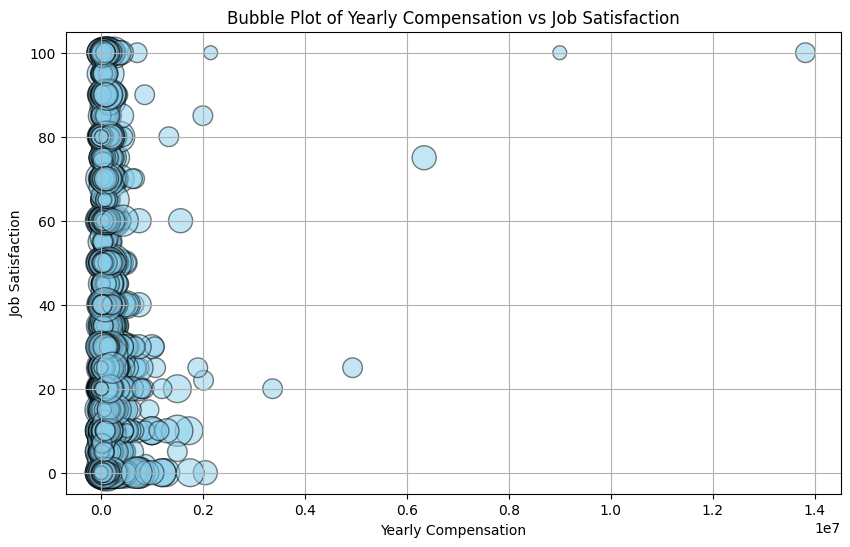

In [13]:
## Write your code here

# Plotting the bubble plot of 'ConvertedCompYearly' vs 'JobSatPoints_6', with 'AgeNumeric' as bubble size
plt.figure(figsize=(10, 6))

# Scatter plot with bubble sizes
plt.scatter(df['ConvertedCompYearly'], df['JobSatPoints_6'], 
            s=df['AgeNumeric'] * 100,
            alpha=0.5, color='skyblue', edgecolor='black')

plt.title('Bubble Plot of Yearly Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation')
plt.ylabel('Job Satisfaction')
plt.grid(True)
plt.show()

### Task 3: Visualizing Composition of Data with Bar Charts


##### 1. Horizontal Bar Chart of `MainBranch` Distribution


Visualize the distribution of respondents’ primary roles to understand their professional focus.



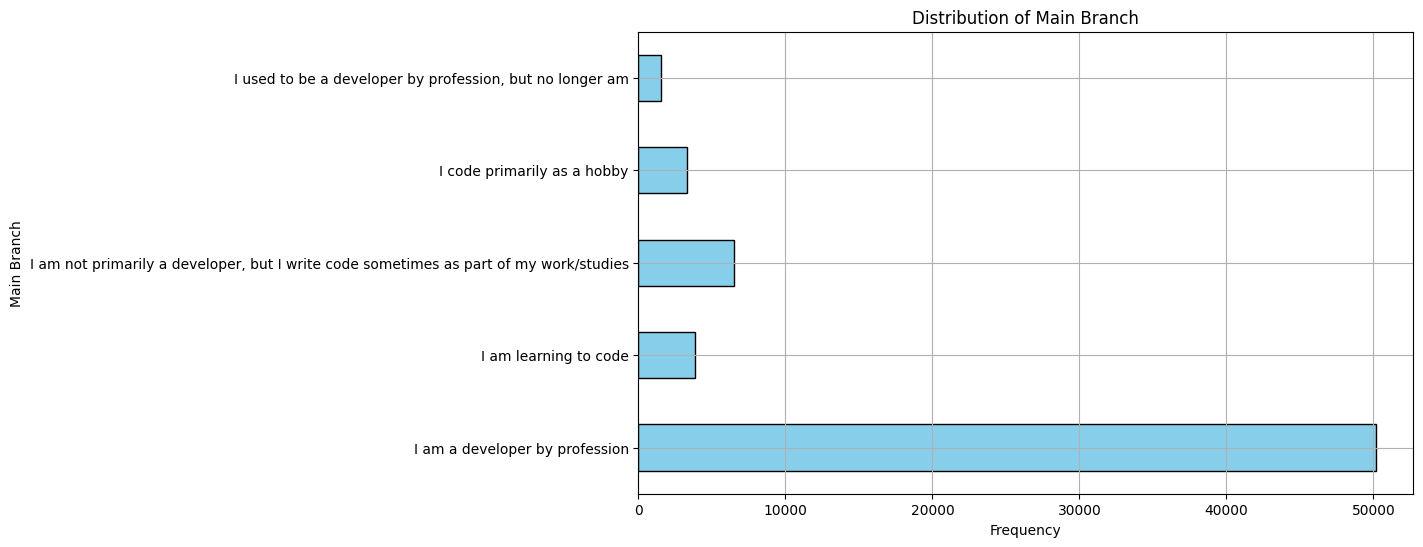

In [14]:
## Write your code here

# Plotting the horizontal bar chart of 'MainBranch' distribution
plt.figure(figsize=(10, 6))
df['MainBranch'].value_counts().sort_index().plot(kind='barh', color='skyblue', edgecolor='black')
plt.title('Distribution of Main Branch')
plt.xlabel('Frequency')
plt.ylabel('Main Branch')
plt.grid(True)
plt.show()

##### 2. Vertical Bar Chart of Top 5 Programming Languages Respondents Want to Work With


Identify the most desired programming languages based on `LanguageWantToWorkWith`.



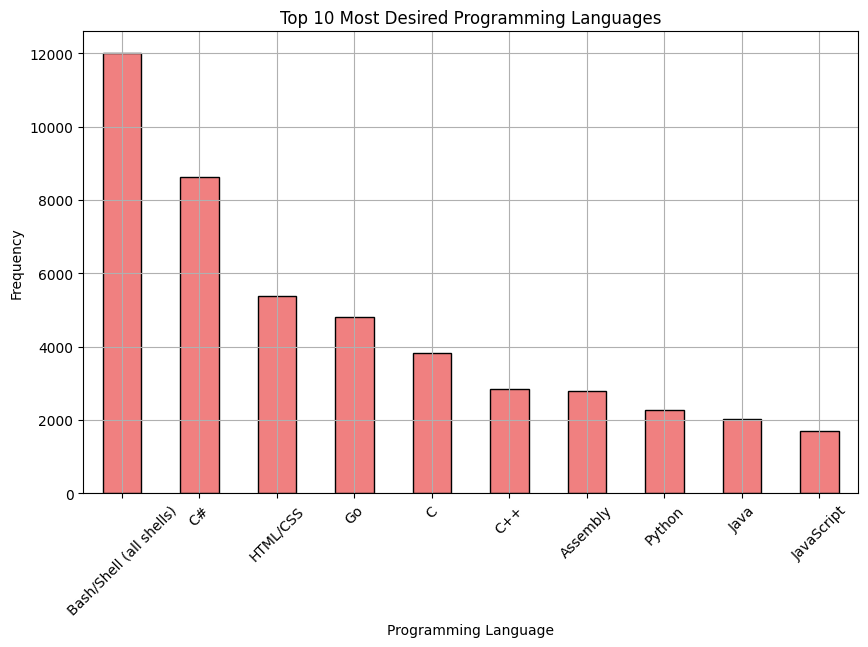

In [17]:
## Write your code here

# Extract the part of 'LanguageWantToWorkWith' before the semicolon
df['LanguageWantToWorkWith_1'] = df['LanguageWantToWorkWith'].str.split(';').str[0]

# Count the occurrences of each language
language_counts = df['LanguageWantToWorkWith_1'].value_counts()

# Take the top 10 most desired languages
top_10_languages = language_counts.head(10)

# Plotting the bar chart for the top 10 most desired programming languages
plt.figure(figsize=(10, 6))
top_10_languages.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.title('Top 10 Most Desired Programming Languages')
plt.xlabel('Programming Language')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 3. Stacked Bar Chart of Median `JobSatPoints_6` and `JobSatPoints_7` by Age Group


Compare job satisfaction metrics across different age groups with a stacked bar chart.


In [19]:
# Print unique values for Age
print("Unique Age Groups:")
print(df['Age'].unique())

Unique Age Groups:
['Under 18 years old' '35-44 years old' '45-54 years old'
 '18-24 years old' '25-34 years old' '55-64 years old' 'Prefer not to say'
 '65 years or older']


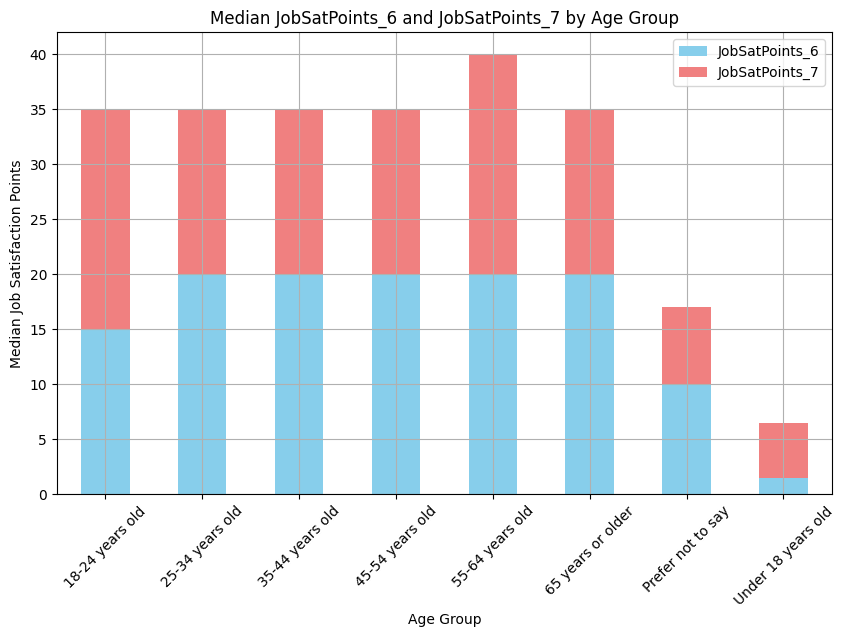

In [21]:
## Write your code here

# Group by Age and calculate median for JobSatPoints_6 and JobSatPoints_7
age_grouped = df.groupby('Age')[['JobSatPoints_6', 'JobSatPoints_7']].median()

# Plotting the stacked bar chart
age_grouped.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])

# Set plot labels and title
plt.title('Median JobSatPoints_6 and JobSatPoints_7 by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Job Satisfaction Points')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 4. Bar Chart of Database Popularity (`DatabaseHaveWorkedWith`)


Identify the most commonly used databases among respondents by visualizing `DatabaseHaveWorkedWith`.



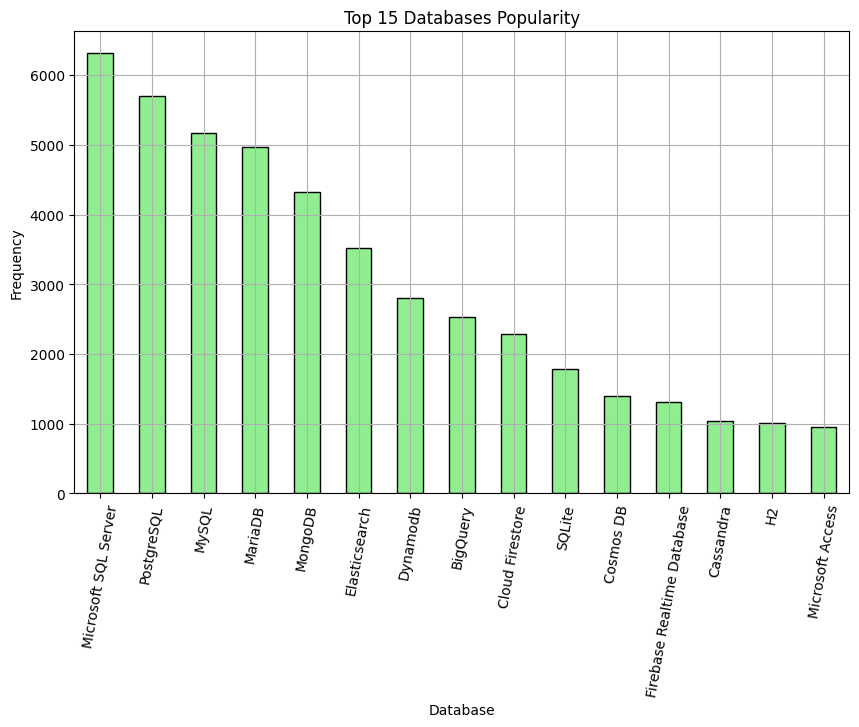

In [31]:
## Write your code here

# Extract the part of 'DatabaseHaveWorkedWith' before the semicolon
df['DatabaseHaveWorkedWith_1'] = df['DatabaseHaveWorkedWith'].str.split(';').str[0]

# Count the occurrences of each database
database_counts = df['DatabaseHaveWorkedWith_1'].value_counts()

# Take the top 15 most popular databases
top_15_databases = database_counts.head(15)

# Plotting the bar chart for the top 15 most popular databases
plt.figure(figsize=(10, 6))
top_15_databases.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Top 15 Databases Popularity')
plt.xlabel('Database')
plt.ylabel('Frequency')
plt.xticks(rotation=80)
plt.grid(True)
plt.show()

### Task 4: Visualizing Comparison of Data with Bar Charts


##### 1. Grouped Bar Chart of Median `ConvertedCompYearly` for Different Age Groups


Compare median compensation across multiple age groups with a grouped bar chart.



/tmp/ipykernel_127/3753764159.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_grouped_compensation = df.groupby('Age')['ConvertedCompYearly'].median()


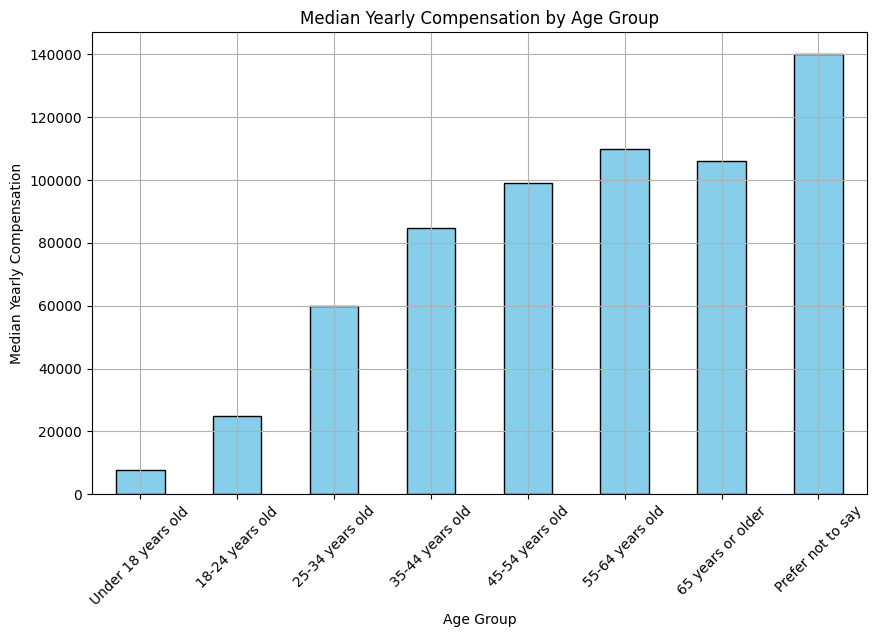

In [35]:
## Write your code here

# Define the desired order of the age groups
age_order = ['Under 18 years old', '18-24 years old', '25-34 years old', '35-44 years old',
             '45-54 years old', '55-64 years old', '65 years or older', 'Prefer not to say']

# Convert the 'Age' column to a categorical type with the specified order
df['Age'] = pd.Categorical(df['Age'], categories=age_order, ordered=True)

# Group by Age and calculate the median for ConvertedCompYearly
age_grouped_compensation = df.groupby('Age')['ConvertedCompYearly'].median()

# Plotting the grouped bar chart
plt.figure(figsize=(10, 6))
age_grouped_compensation.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Median Yearly Compensation by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Median Yearly Compensation')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### 2. Bar Chart of Respondent Count by Country


Show the distribution of respondents by country to see which regions are most represented.



In [38]:
# Print unique countries
print(df['Country'].unique())

['United States of America'
 'United Kingdom of Great Britain and Northern Ireland' 'Canada' 'Norway'
 'Uzbekistan' 'Serbia' 'Poland' 'Philippines' 'Bulgaria' 'Switzerland'
 'India' 'Germany' 'Ireland' 'Italy' 'Ukraine' 'Australia' 'Brazil'
 'Japan' 'Austria' 'Iran, Islamic Republic of...' 'France' 'Saudi Arabia'
 'Romania' 'Turkey' 'Nepal' 'Algeria' 'Sweden' 'Netherlands' 'Croatia'
 'Pakistan' 'Czech Republic' 'Republic of North Macedonia' 'Finland'
 'Slovakia' 'Russian Federation' 'Greece' 'Israel' 'Belgium' 'Mexico'
 'United Republic of Tanzania' 'Hungary' 'Argentina' 'Portugal'
 'Sri Lanka' 'Latvia' 'China' 'Singapore' 'Lebanon' 'Spain' 'South Africa'
 'Lithuania' 'Viet Nam' 'Dominican Republic' 'Indonesia' 'Kosovo'
 'Morocco' 'Taiwan' 'Georgia' 'San Marino' 'Tunisia' 'Bangladesh'
 'Nigeria' 'Liechtenstein' 'Denmark' 'Ecuador' 'Malaysia' 'Albania'
 'Azerbaijan' 'Chile' 'Ghana' 'Peru' 'Bolivia' 'Egypt' 'Luxembourg'
 'Montenegro' 'Cyprus' 'Paraguay' 'Kazakhstan' 'Slovenia' 'Jordan'
 

In [42]:
country_to_continent = {
    'North America': ['United States of America', 'Canada', 'Mexico', 'Dominican Republic', 'Cuba', 'Guatemala', 'Bahamas', 'Honduras', 'El Salvador', 'Jamaica', 'Costa Rica', 'Panama', 'Nicaragua', 'Haiti', 'Belize', 'Trinidad and Tobago', 'Barbados', 'Saint Kitts and Nevis', 'Antigua and Barbuda'],
    'Europe': ['United Kingdom of Great Britain and Northern Ireland', 'Norway', 'Serbia', 'Poland', 'Bulgaria', 'Switzerland', 'Germany', 'Ireland', 'Italy', 'Ukraine', 'Austria', 'France', 'Romania', 'Sweden', 'Netherlands', 'Croatia', 'Czech Republic', 'Republic of North Macedonia', 'Finland', 'Slovakia', 'Greece', 'Belgium', 'Latvia', 'Kosovo', 'Lithuania', 'Slovenia', 'Bosnia and Herzegovina', 'Estonia', 'Malta', 'Belarus', 'Republic of Moldova', 'Isle of Man', 'Luxembourg', 'Montenegro', 'Cyprus', 'Slovenia', 'Iceland', 'Hungary', 'Portugal', 'Spain', 'Andorra', 'Monaco'],
    'Asia': ['Uzbekistan', 'Philippines', 'India', 'Iran, Islamic Republic of...', 'Saudi Arabia', 'Turkey', 'Nepal', 'Israel', 'Pakistan', 'Russian Federation', 'China', 'Singapore', 'Lebanon', 'South Korea', 'Taiwan', 'Georgia', 'Armenia', 'United Arab Emirates', 'Maldives', 'Malaysia', 'Azerbaijan', 'Kazakhstan', 'Jordan', 'Sri Lanka', 'Thailand', 'Indonesia', 'Kosovo', 'Vietnam', 'Bangladesh', 'Bangladesh', 'Palestine', 'Qatar', 'Kuwait', 'Tajikistan', 'Myanmar', 'Republic of Korea', 'Syria', 'Iraq', 'Afghanistan', 'Kyrgyzstan', 'Mongolia', 'Cambodia', 'Angola', 'Turkmenistan', 'Bahrain', 'Yemen', 'Oman', 'Papua New Guinea', 'Brunei Darussalam', 'Bhutan', 'Guinea', 'Niger', 'Lao People\'s Democratic Republic', 'Hong Kong (S.A.R.)', 'North Korea'],
    'South America': ['Brazil', 'Argentina', 'Chile', 'Peru', 'Bolivia', 'Ecuador', 'Paraguay', 'Venezuela, Bolivarian Republic of...', 'Colombia', 'Uruguay', 'Guyana', 'Suriname'],
    'Africa': ['Algeria', 'South Africa', 'Nigeria', 'Morocco', 'Egypt', 'Ghana', 'Congo, Republic of the...', 'Botswana', 'Gabon', 'Kenya', 'Cameroon', 'Uganda', 'Senegal', 'Zimbabwe', 'Mauritius', 'Cuba', 'Liberia', 'Congo, Democratic Republic of the...', 'Mali', 'Angola', 'Mauritania', 'Sierra Leone', 'Togo', 'Burkina Faso', 'Gabon', 'Mozambique', 'Benin', 'Guinea-Bissau', 'Malawi', 'Equatorial Guinea', 'Chad', 'Djibouti', 'Central African Republic', 'Lesotho', 'Swaziland', 'Côte d\'Ivoire', 'Tanzania', 'Sao Tome and Principe', 'Liberia', 'Seychelles', 'Liberian Arab Jamahiriya', 'Cape Verde'],
    'Oceania': ['Australia', 'New Zealand', 'Fiji', 'Solomon Islands', 'Samoa', 'Micronesia, Federated States of...', 'Nauru'],
    'Unknown': ['Nomadic', 'nan']
}

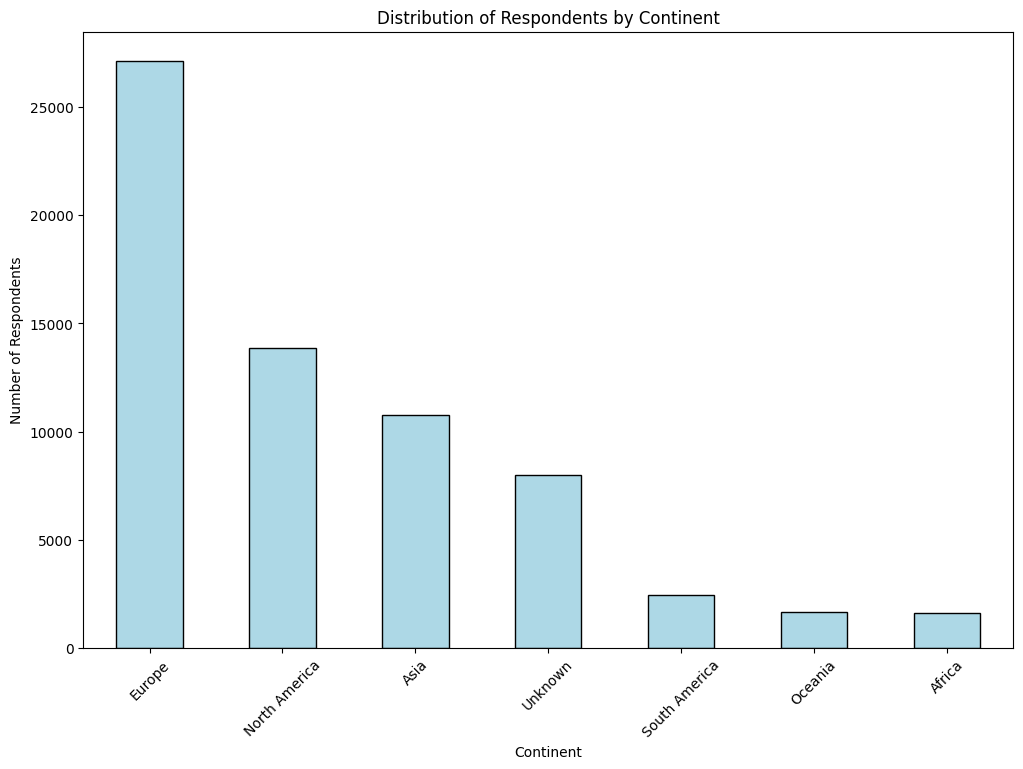

In [44]:
## Write your code here

# Reverse the dictionary to map countries to continents
country_to_continent_reversed = {country: continent for continent, countries in country_to_continent.items() for country in countries}

# Map each country in the 'Country' column to its continent
df['Continent'] = df['Country'].map(country_to_continent_reversed).fillna('Unknown')

# Count the occurrences of each continent
continent_counts = df['Continent'].value_counts()

# Plotting the bar chart for the distribution of respondents by continent
plt.figure(figsize=(12, 8))
continent_counts.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Distribution of Respondents by Continent')
plt.xlabel('Continent')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45)
plt.show()

### Final Step: Review


This lab demonstrates how to create and interpret different types of bar charts, allowing you to analyze the composition, comparison, and distribution of categorical data in the Stack Overflow dataset, including main professional branches, programming language preferences, and compensation by age group. Bar charts effectively compare counts and median values across various categories.


## Summary


After completing this lab, you will be able to:
- Create a horizontal bar chart to visualize the distribution of respondents' primary roles, helping to understand their professional focus.
- Develop a vertical bar chart to identify the most desired programming languages based on the LanguageWantToWorkWith variable.
- Use a stacked bar chart to compare job satisfaction metrics across different age groups.
- Create a bar chart to visualize the most commonly used databases among respondents using the DatabaseHaveWorkedWith variable.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


Copyright © IBM Corporation. All rights reserved.
